In [9]:
import cvxpy as cp
from mip_cvxpy import PYTHON_MIP

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# generate student data
student = pd.read_csv("数据/tutor.csv")
# 项目
for i in range(0,student.shape[0]):
    #fieldlist = student.iloc[i,1:5]
    data = int(np.random.normal(10,5,size=1))
    if data >21 or data < 0:
        data = np.random.randint(1,11,size=1)
    student.iloc[i,1] = data
    for j in range(2,5):
        while 1:
            data = int(np.random.normal(10,5,size=1))
            if data >21 or data < 0:
                data = np.random.randint(1,11,size=1)
            student.iloc[i,j] = data
            for w in range(1,j):
                if student.iloc[i,j] == student.iloc[i,w]:
                    break
            if w==j-1 and student.iloc[i,j] != student.iloc[i,w]:
                break
# 导师
for i in range(0,student.shape[0]):
    data = int(np.random.normal(1,5,size=1))
    if data >21 or data < 0:
        data = np.random.randint(1,11,size=1)
        
    student.iloc[i,5] = np.random.randint(1,31,size=1)
    for j in range(6,9):
        while 1:
            student.iloc[i,j] = np.random.randint(1,31,size=1)
            for w in range(5,j):
                if student.iloc[i,j] == student.iloc[i,w]:
                    break
            if w==j-1 and student.iloc[i,j] != student.iloc[i,w]:
                break
student.head(5)

# generate superviosr data
tutorlist = pd.read_csv("数据/supervisor.csv")
tutorlist['lower']=''
tutorlist['upper']=''
for i in range(0,tutorlist.shape[0]):
    #fieldlist = student.iloc[i,1:5]
    tutorlist.loc[i,'lower']=int(np.random.randint(1,student.shape[0]/tutorlist.shape[0]+1,size=1))
    tutorlist.loc[i,'upper']=int(np.random.randint(1,4,size=1)+tutorlist.loc[i,'lower']+1)
    
    tutorlist.iloc[i,1] = np.random.randint(1,20,size=1)
    for j in range(2,5):
        while 1:
            tutorlist.iloc[i,j] = np.random.randint(1,7,size=1)
            for w in range(1,j):
                if tutorlist.iloc[i,j] == tutorlist.iloc[i,w]:
                    break
            if w==j-1 and tutorlist.iloc[i,j] != tutorlist.iloc[i,w]:
                break
tutorlist.head(2)
tutorlist.to_csv("tutordata.csv",index=False)
student.to_csv("studentdata.csv",index=False)

,tutor,filed1,filed2,filed3,filed4,lower,upper
0,1,1,2,4,6,3,6
1,2,8,5,2,1,3,5


In [24]:
student = pd.read_csv("studentdata.csv")
tutorslist = pd.read_csv("tutordata.csv")

In [25]:
student

,student,field1,field2,field3,field4,tutor1,tutor2,tutor3,tutor4
0,1,18,6,0,4,26,2,13,20
1,2,10,3,1,2,9,22,24,20
2,3,8,3,18,11,20,10,13,15
3,4,10,13,12,5,1,14,11,24
4,5,10,9,5,2,5,2,30,28
...,...,...,...,...,...,...,...,...,...
95,96,7,8,4,14,7,23,5,27
96,97,7,4,12,8,3,28,20,7
97,98,15,10,12,5,9,8,13,5
98,99,9,8,14,10,23,24,1,11


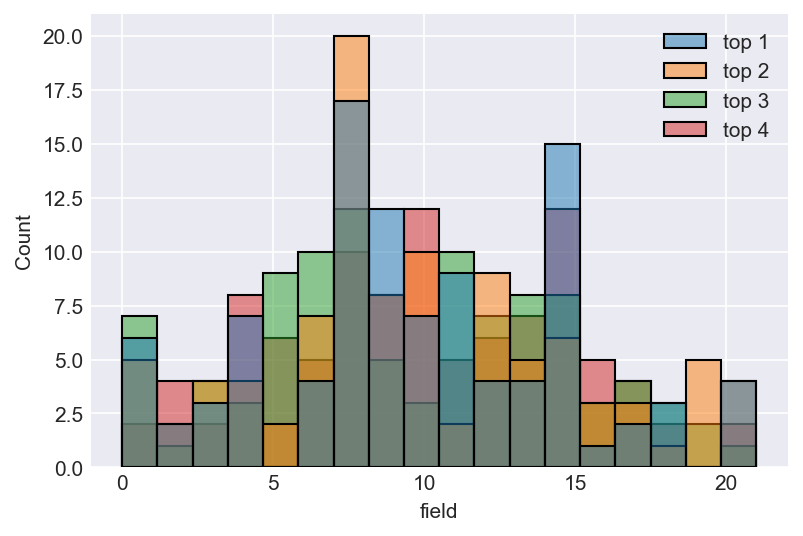

In [26]:
part = student.iloc[0:,1:5]
part.rename(columns ={'field1':"top 1","field2":"top 2","field3":"top 3","field4":"top 4"},inplace=True)
plt.figure(dpi=150)
plt.style.use('seaborn-darkgrid') #'seaborn-bright'
figer = sns.histplot(part,bins=18)
figer.set_xlabel("field")
plt.savefig("fieldPreference.svg",dpi=1000)

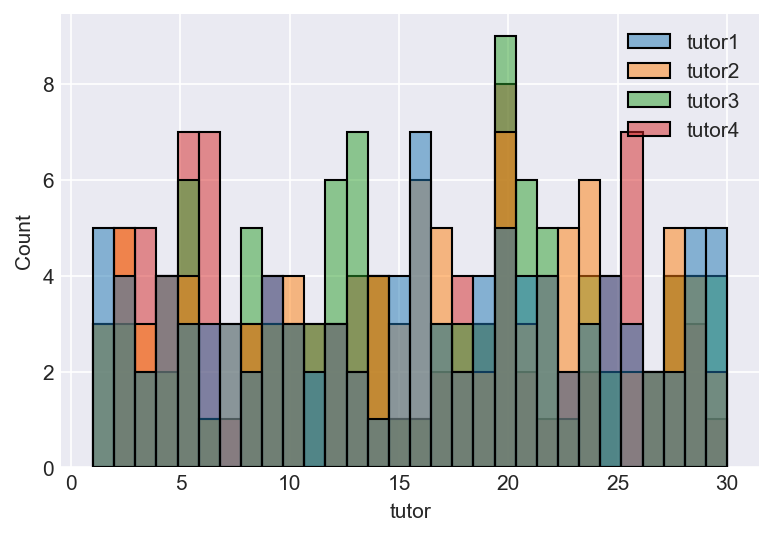

In [27]:
part = student.iloc[0:,5:10]
plt.figure(dpi=150)
figer = sns.histplot(part,bins=30)
figer.set_xlabel("tutor")
plt.savefig("tutorPreference.svg",dpi=1000)

In [28]:
tutorlist.head(5)

,tutor,filed1,filed2,filed3,filed4
0,1,7,6,2,5
1,2,2,2,4,4
2,3,7,4,1,4
3,4,1,1,5,5
4,5,1,5,1,7
